# Example for Lift Analysis

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import Wing, LiftAnalysis, LiftAndMomentAnalysis
import numpy as np

## Definition of wing

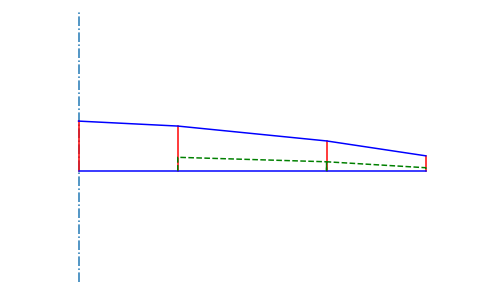

In [2]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4
airfoils = [None]*4

twists2 = [0, 0, np.deg2rad(-1), np.deg2rad(-2)]

plt.figure(figsize=(8,5))

wing = Wing.create_from_planform(span_positions, chord_lengths, offsets, twists, airfoils);
wing.set_root_pos(0.0)
wing.set_airbrake(1.5,2.9)
wing.set_flap('flap', 2, 5,[0.3,0.3])
wing.set_flap('flap2', 5, 7, [0.3,0.2])

wing.plot()
plt.savefig('wing.png')

In [7]:
liftana.flaps_distribution

{'flap': array([  7.08295337e-04,   1.34251894e-03,   1.88403544e-03,
          2.35113626e-03,   2.75402559e-03,   3.12900458e-03,
          3.48197274e-03,   3.85615185e-03,   4.24777561e-03,
          4.71384388e-03,   5.24303354e-03,   5.92659291e-03,
          6.75212061e-03,   7.90065827e-03,   9.38477639e-03,
          1.16964138e-02,   1.50591993e-02,   2.23433380e-02,
          4.11387453e-02,   4.79851718e-02,   5.07636898e-02,
          5.22881457e-02,   5.28977916e-02,   5.29595516e-02,
          5.25361888e-02,   5.16005523e-02,   5.01379207e-02,
          4.77359759e-02,   4.41471730e-02,   3.66810256e-02,
          1.83307633e-02,   1.15147470e-02,   8.39538111e-03,
          6.32194564e-03,   5.01003484e-03,   4.02851493e-03,
          3.33343518e-03,   2.77543856e-03,   2.40961765e-03,
          2.09635529e-03,   1.84890039e-03,   1.63425316e-03,
          1.46103694e-03,   1.30772720e-03,   1.18063803e-03,
          1.07923149e-03,   9.93908462e-04,   9.15326948e-04,


## Define analysis object and calculate distributions

/home/jonathan/Dokumente/Akaflieg/wingstructure/wingstructure/analysis.py:21: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


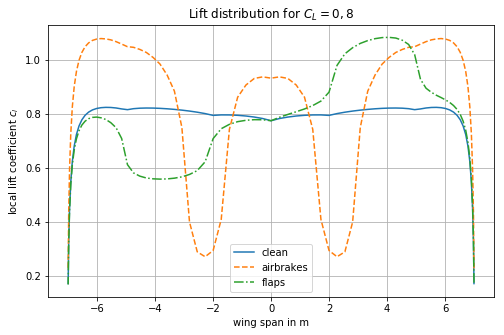

In [3]:
liftana = LiftAnalysis(wing)

span_pos = liftana.calculation_positions

α, distribution = liftana.calculate(lift=0.8)
α_ab, distribution_ab = liftana.calculate(lift=0.8, airbrake=True)
α_qr, distribution_q = liftana.calculate(lift=0.8, 
            flap_deflections={'flap': [np.radians(5),np.radians(-5)]})

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
